In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers (1).csv


In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('Mall_Customers.csv')

In [ ]:
df.head()

,customerid,gender,age,annual_income_k,spending_score_1_100,cluster
0,1,Male,19,15,39,6
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,6


In [ ]:
df.columns =(
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(r"[()$]","",regex=True)
    .str.replace("-","_")
    .str.replace(" ","_")
)

In [ ]:
df.columns

Index(['customerid', 'gender', 'age', 'annual_income_k',
       'spending_score_1_100'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   customerid            200 non-null    int64 
 1   gender                200 non-null    object
 2   age                   200 non-null    int64 
 3   annual_income_k       200 non-null    int64 
 4   spending_score_1_100  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,customerid,age,annual_income_k,spending_score_1_100
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
# selecting features

x=df[['annual_income_k','spending_score_1_100']]
x.head()

,annual_income_k,spending_score_1_100
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


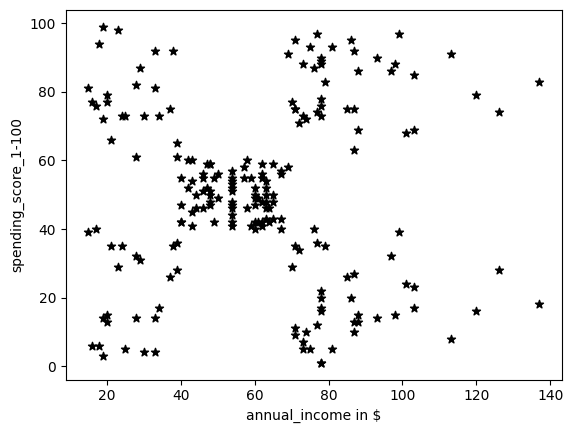

In [ ]:
# visualising row data
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x['annual_income_k'],x['spending_score_1_100'],color='black',marker='*')
plt.xlabel('annual_income in $')
plt.ylabel('spending_score_1-100')
plt.show()

In [ ]:
# k means clustering
# k means tries to group pointes so that points in the
# same group are close to each other



#from sklearn.cluster import KMeans

#kmeans = KMeans(n_clusters=5, random_state=42)
#labels = kmeans.fit_predict(x)



# n_cluster , divide the customer into 5 groups
#fit  (x)- looks at all data points in x, place
# 5 random centroids
# assign each point to center of assinged points in
# iteration
# repeats until stable
# for each data points returns which clustr it belongs to
#represents them with numeric values

In [ ]:
# The Elbow Method is a heuristic used in K-means clustering to determine the optimal number of clusters.
# It involves plotting the Within-Cluster Sum of Squares (WCSS) against the number of clusters (k).

In [ ]:
# Elbow method:
# it heps to find how many groups ot use
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
     kmeans = KMeans(n_clusters= k, random_state=42)
     kmeans.fit(x)
     wcss.append(kmeans.inertia_)

    # wcss - within cluster sum of squares
    # lower wcss - tightly  clusters
    # higher wcss - messy cluster

    # we will store this for each kmeans
    # each loops - new model - defferent number of clusters

    #in each loop k increases, ecss decresease and improvement
    #slows down after certain point


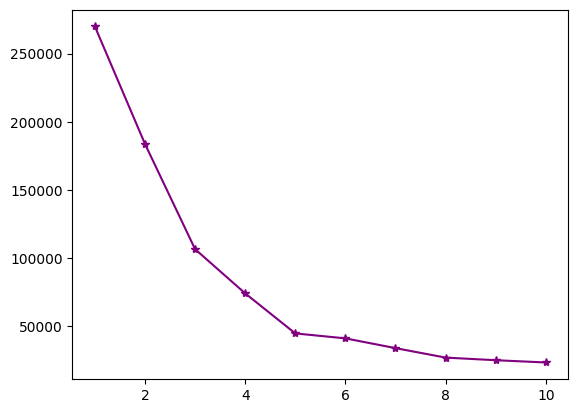

In [ ]:
plt.plot(range(1,11),wcss,color='purple',marker='*')





In [ ]:
kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(x)

In [ ]:
labels[:10]

array([6, 3, 4, 3, 6, 3, 4, 3, 4, 3], dtype=int32)

In [ ]:
df["cluster"] = labels
df.head()

,customerid,gender,age,annual_income_k,spending_score_1_100,cluster
0,1,Male,19,15,39,6
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,6


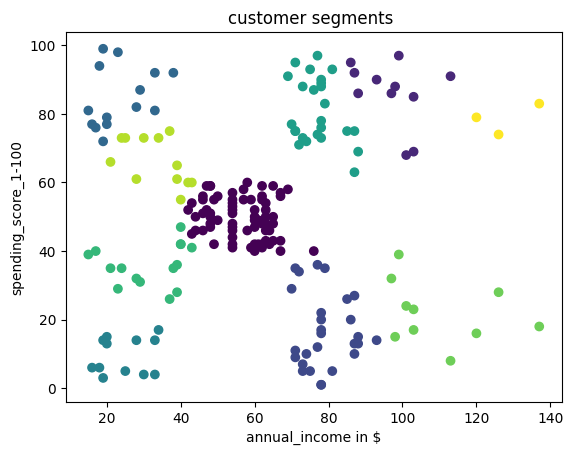

In [ ]:
# visualize clusters
plt.scatter(
    x['annual_income_k'],
    x['spending_score_1_100'],
    c=labels
)

plt.xlabel('annual_income in $')
plt.ylabel('spending_score_1-100')
plt.title('customer segments ')
plt.show()

In [ ]:
# applying PCA here

# Principle Comound Analysis - PCA

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)


# components = 2 - reducing data 2 dimensions,
# information preserved mostly

# PCA are used when data has many features
# so pca compress information then we visualize it
# pca does not create clustes, it help us see them

Text(0.5, 1.0, 'customer segments')

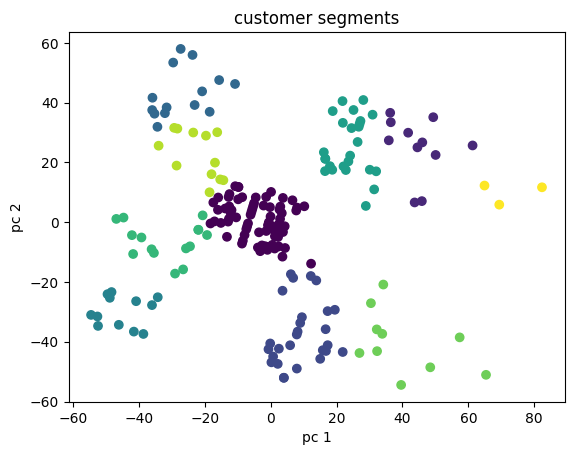

In [ ]:
#  visualize clusters using PCA

plt.scatter(
    x_pca[:,0],
    x_pca[:,1],
    c=df['cluster']
 )

plt.xlabel('pc 1')
plt.ylabel('pc 2')
plt.title('customer segments')

In [ ]:
df.groupby('cluster')[['annual_income_k','spending_score_1_100']].mean()

,annual_income_k,spending_score_1_100
cluster,,
0,56.464789,49.774648
1,97.090909,86.090909
2,79.000000,16.592593
3,23.428571,84.785714
4,24.583333,9.583333
5,76.960000,80.800000
6,31.533333,35.866667
7,109.700000,22.000000
8,33.500000,66.250000


In [ ]:
df['segment'] = df['cluster'].map({
    0:'mid income - mid spend',
    1:'high income - high spend',
    2:'low income - high spend',
    3:'high income - low spend',
    4:'low income - low spend'
})

In [ ]:
df.head()

,customerid,gender,age,annual_income_k,spending_score_1_100,cluster,segment
0,1,Male,19,15,39,6,NaN
1,2,Male,21,15,81,3,high income - low spend
2,3,Female,20,16,6,4,low income - low spend
3,4,Female,23,16,77,3,high income - low spend
4,5,Female,31,17,40,6,NaN


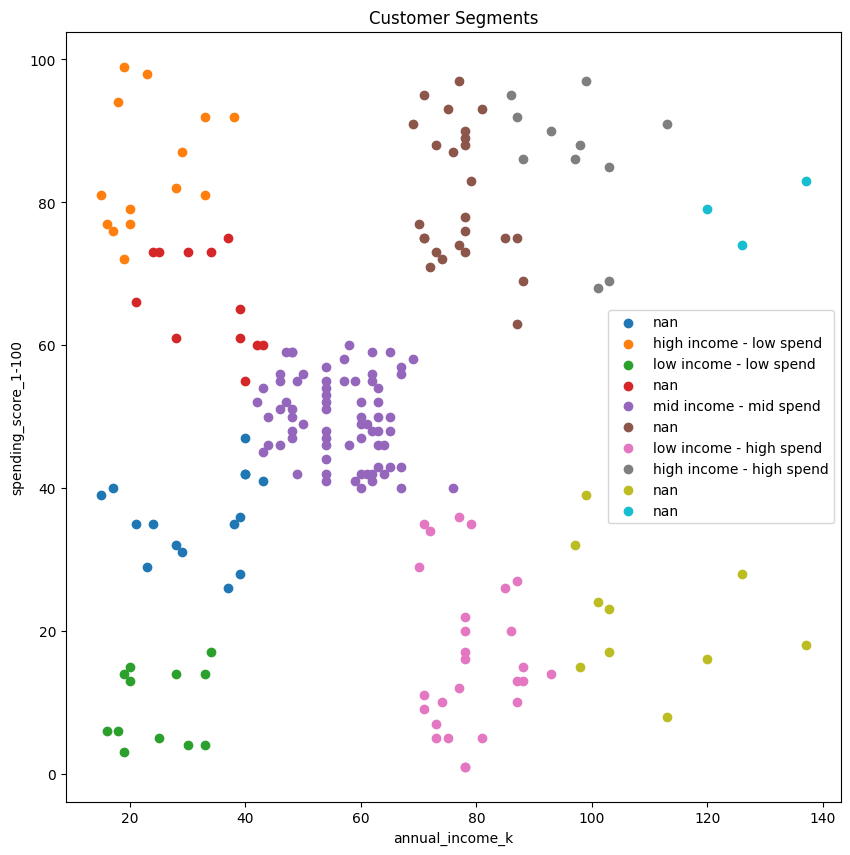

In [ ]:
plt.figure(figsize=(10,10))
for segment_name,cluster_id in df[['segment','cluster']].drop_duplicates().itertuples(index=False):
    subset = df[df['cluster'] == cluster_id]
    plt.scatter(
        subset['annual_income_k'],
        subset['spending_score_1_100'],
        label=segment_name
    )
plt.xlabel('annual_income_k')
plt.ylabel('spending_score_1-100')
plt.legend()
plt.title('Customer Segments')
plt.show()